<a href="https://colab.research.google.com/github/GusdPaula/postgraduation_fiap/blob/main/fase_5/fase5_perceptron_DTAT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
data = pd.read_excel('/content/drive/MyDrive/deep_learning/SementesAbobora.xlsx')

In [ ]:
from sklearn.utils import shuffle

data = shuffle(data)

In [ ]:
data.Class.value_counts()

,count
Class,
(A) Çerçevelik,1300
(B) Ürgüp Sivrisi,1200


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

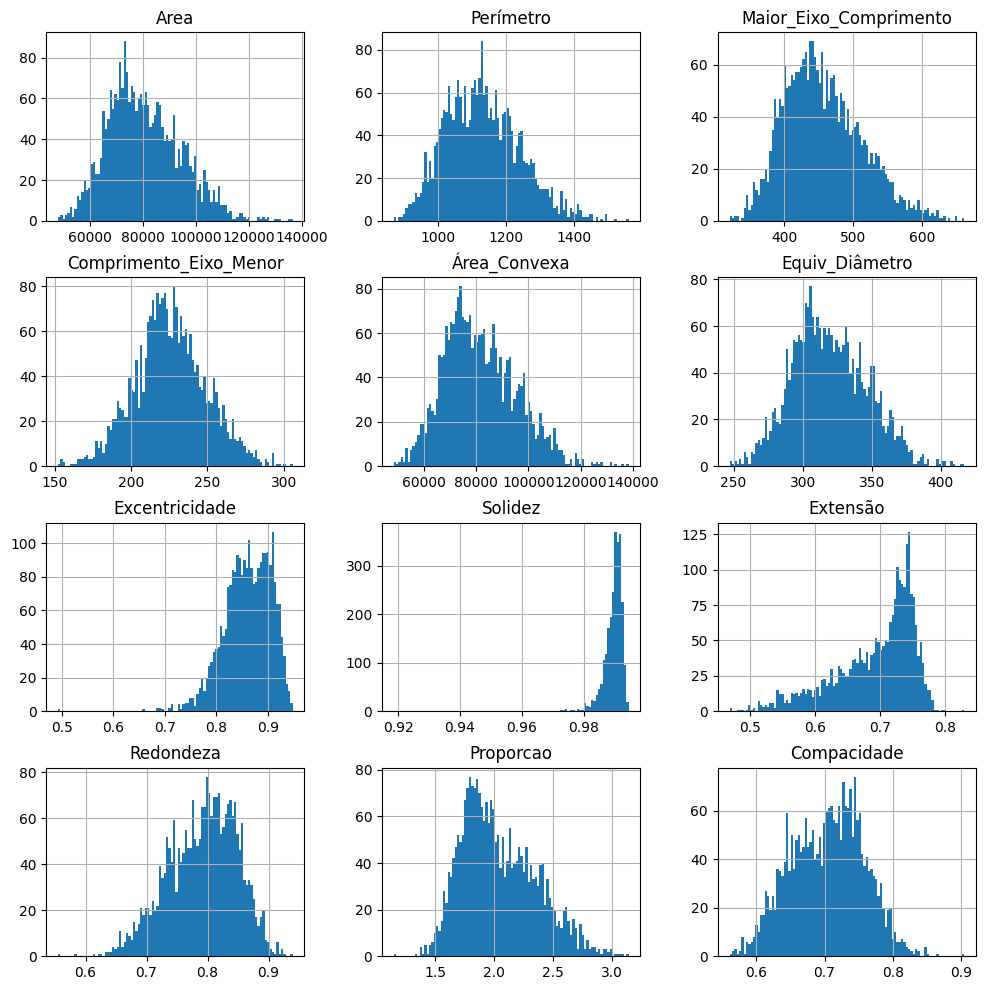

In [ ]:
data.hist(bins=100, figsize=(12, 12))
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data.Class = le.fit_transform(data['Class'])

<Axes: >

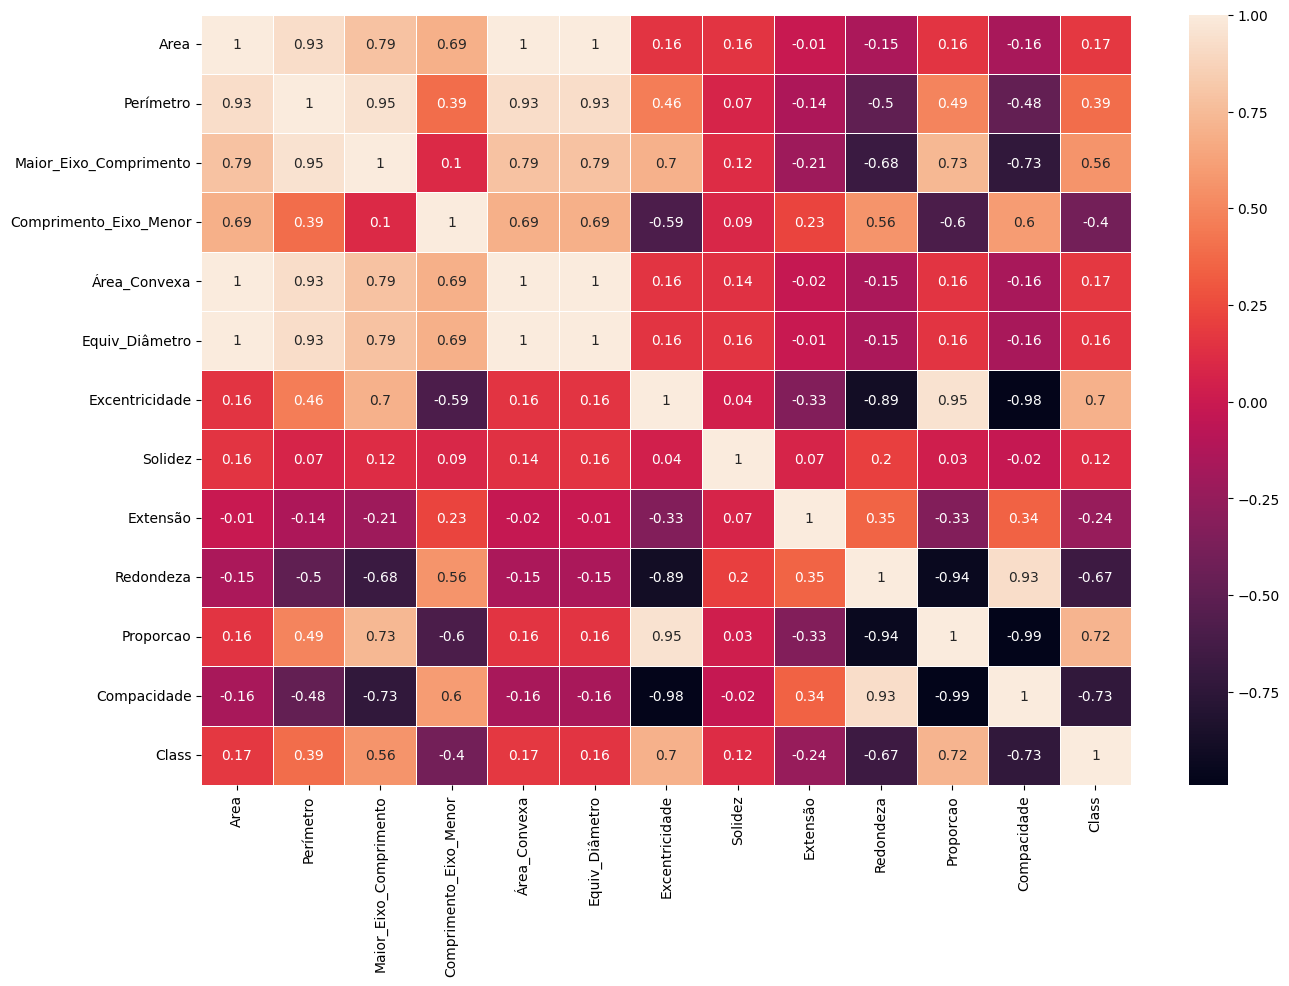

In [ ]:
correlation_matrix = data.corr().round(2)

fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(data=correlation_matrix, annot=True, linewidths=.5, ax=ax)

In [ ]:
y = data.Class
X = data[[col for col in data.columns if col != 'Class']]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
scaler.fit(X_test)

StandardScaler()

In [ ]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
import numpy as np
y_train = np.asarray(y_train).astype('float32').reshape((-1, 1))
y_test = np.asarray(y_test).astype('float32').reshape((-1, 1))

In [ ]:
import tensorflow as tf

from tensorflow import keras
from keras import models
from keras import layers
from keras import metrics
from keras.optimizers import Adam
from keras.metrics import Precision
from tqdm.keras import TqdmCallback

In [ ]:
tf.random.set_seed(7)

input_shape = X_train.shape[1]
output_shape = y_train.shape[1]
batch_size = 20

model = models.Sequential()

model.add(layers.Dense(batch_size, input_shape=(input_shape,), activation='relu'))

model.add(layers.Dense(12, activation='relu'))
model.add(layers.Dense(6, activation='relu'))

model.add(layers.Dropout(0.5))

model.add(layers.Dense(output_shape, activation='sigmoid'))

learning_rate = 0.001
otimizador = Adam(learning_rate=learning_rate)

model.compile(loss='binary_crossentropy', optimizer=otimizador, metrics=['accuracy'])

model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 20)                  │             260 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 12)                  │             252 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 6)                   │              78 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 6)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │               7 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 597 (2.33 KB)

 Trainable params: 597 (2.33 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
epoch = 100
hist = model.fit(X_train,
                 y_train,
                 epochs=epoch,
                 batch_size=batch_size,
                 shuffle=True,
                 validation_data=(X_test, y_test),
                 verbose=0,
                 callbacks=[TqdmCallback(verbose=0)])

0epoch [00:00, ?epoch/s]

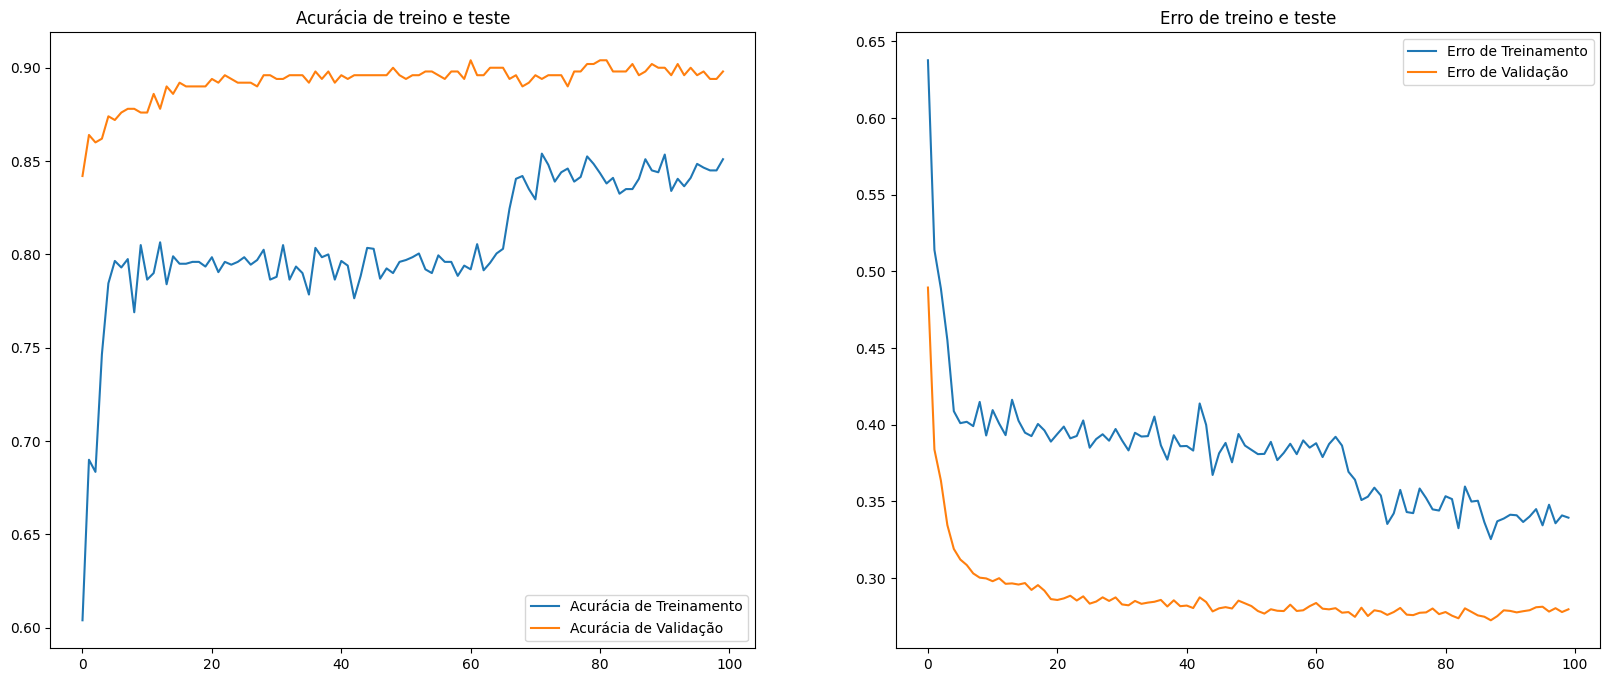

In [ ]:
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']

loss = hist.history['loss']
val_loss = hist.history['val_loss']

epoch_range = range(epoch)

plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.plot(epoch_range, acc, label='Acurácia de Treinamento')
plt.plot(epoch_range, val_acc, label='Acurácia de Validação')
plt.legend(loc='lower right')
plt.title('Acurácia de treino e teste')

plt.subplot(1, 2, 2)
plt.plot(epoch_range, loss, label='Erro de Treinamento')
plt.plot(epoch_range, val_loss, label='Erro de Validação')
plt.legend(loc='upper right')
plt.title('Erro de treino e teste')
plt.show()

In [ ]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test)
y_pred_class = [round(x[0]) for x in y_pred]
y_test_class = y_test

class_names = []
for i in y.unique():
  class_names.append(le.inverse_transform([i])[0])

print(classification_report(y_test_class, y_pred_class, target_names=class_names))

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
                   precision    recall  f1-score   support

(B) Ürgüp Sivrisi       0.87      0.95      0.91       269
  (A) Çerçevelik        0.93      0.84      0.88       231

         accuracy                           0.90       500
        macro avg       0.90      0.89      0.90       500
     weighted avg       0.90      0.90      0.90       500

